<a href="https://colab.research.google.com/github/lior0110/main/blob/master/DJI_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lior0110/main/blob/master/DJI_test2.ipynb)

In [0]:
import os 
if not os.path.exists('main'): os.system('git clone https://github.com/lior0110/main/')
os.chdir('main')

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [0]:
# read the given data
data = pd.read_csv('DJI2.csv', parse_dates=True) # , index_col=0
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,12459.540039,12580.349609,12404.820313,12474.519531,12474.519531,327200000
1,2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2,2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
3,2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
4,2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3328 non-null   object 
 1   Open       3328 non-null   float64
 2   High       3328 non-null   float64
 3   Low        3328 non-null   float64
 4   Close      3328 non-null   float64
 5   Adj Close  3328 non-null   float64
 6   Volume     3328 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.1+ KB


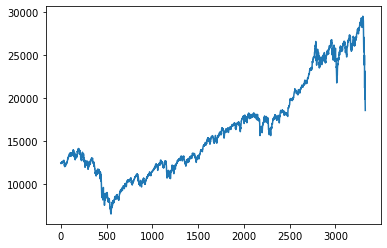

In [0]:
data['Adj Close'].plot()

In [0]:
# see if 'Adj Close' is the same as 'Close'
# if yes drop 'Adj Close'
test = data['Adj Close'] == data['Close']
if all(data['Adj Close'] == data['Close']):
    data = data.drop(columns='Adj Close')



In [0]:
data.head()


,Date,Open,High,Low,Close,Volume
0,2007-01-03,12459.540039,12580.349609,12404.820313,12474.519531,327200000
1,2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,259060000
2,2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,235220000
3,2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,223500000
4,2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,225190000


In [0]:
data.tail()


,Date,Open,High,Low,Close,Volume
3323,2020-03-17,20487.050781,21379.349609,19882.259766,21237.380859,793060000
3324,2020-03-18,20188.689453,20489.330078,18917.460938,19898.919922,871360000
3325,2020-03-19,19830.009766,20442.630859,19177.130859,20087.189453,780300000
3326,2020-03-20,20253.150391,20531.259766,19094.269531,19173.980469,872290000
3327,2020-03-23,19028.359375,19121.009766,18213.650391,18591.929688,787970000


In [0]:
data.columns
data.shape

(3328, 6)

In [0]:
# get data in windows format

window_len = 100 # window length to use for prediction
useVolume = True

windows = []

for i in range(data.shape[0]-window_len+1):
    windows.append(data[i:i+window_len])


In [0]:
windows[-1]

,Date,Open,High,Low,Close,Volume
3228,2019-10-29,27061.070313,27165.939453,27039.759766,27071.460938,269610000
3229,2019-10-30,27110.710938,27204.359375,26999.640625,27186.689453,231750000
3230,2019-10-31,27188.369141,27188.369141,26918.289063,27046.230469,270910000
3231,2019-11-01,27142.949219,27347.429688,27142.949219,27347.359375,270870000
3232,2019-11-04,27402.060547,27517.580078,27402.060547,27462.109375,273030000
...,...,...,...,...,...,...
3323,2020-03-17,20487.050781,21379.349609,19882.259766,21237.380859,793060000
3324,2020-03-18,20188.689453,20489.330078,18917.460938,19898.919922,871360000
3325,2020-03-19,19830.009766,20442.630859,19177.130859,20087.189453,780300000
3326,2020-03-20,20253.150391,20531.259766,19094.269531,19173.980469,872290000


In [0]:
# comparing two windows to get their distance 
def window_compare(window1, window2):
  win1 = window1.Close
  win2 = window2.Close
  dist = np.corrcoef(win1, win2)[1,0]
  return dist


In [0]:
window_compare(windows[1], windows[2])

0.9817382579497858

In [0]:
windows[1].Close
np.corrcoef(windows[1].Close, windows[100].Close, rowvar=True)[1,0]

0.5845374871528823